In [1]:
import scanpy
import scanpy.external as sce
import scanpy as sc
import anndata as ad
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#loading and setting up the anndata objects
artemia=scanpy.read_h5ad("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/data_integrated_harmony_DUBStepR_3_2.h5ad", chunk_size=6000)
features_AR=pd.DataFrame({'features': artemia.raw.var['_index']})
artemia_2=ad.AnnData(artemia.raw.X,obs=artemia.obs,var=features_AR,obsm=artemia.obsm,uns=artemia.uns)
artemia_2.var_names=artemia.raw.var['_index']
artemia_2.obs['seurat_clusters'] = artemia_2.obs['seurat_clusters'].astype('category') 
artemia_2.obs['RNA_snn_res.0.05'] = artemia_2.obs['RNA_snn_res.0.05'].astype('category') 
artemia_2.obs['RNA_snn_res.0.2'] = artemia_2.obs['RNA_snn_res.0.2'].astype('category') 
artemia_2.obs['RNA_snn_res.0.5'] = artemia_2.obs['RNA_snn_res.0.5'].astype('category') 
artemia_2.obs['RNA_snn_res.2'] = artemia_2.obs['RNA_snn_res.2'].astype('category') 

/nfs/scistore18/vicosgrp/melkrewi/.local/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/tmp/ipykernel_3004122/1527604099.py:4: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  artemia_2=ad.AnnData(artemia.raw.X,obs=artemia.obs,var=features_AR,obsm=artemia.obsm,uns=artemia.uns)


In [3]:
#rename_clusters
artemia_2
old_to_new = {
    0:'Tracheal cells',
    1:'Germ cells A',
    2:'Ovarian muscle cells',3:'Escort cells',4:'Follicle cells',5:'Prefollicle cells',6:'Germ cells B'}
artemia_2.obs['new_clusters'] = (
    artemia_2.obs['seurat_clusters']
    .map(old_to_new)
    .astype('category')
)
artemia_2.obs['new_clusters'] = artemia_2.obs['new_clusters'].cat.reorder_categories(['Ovarian muscle cells', 'Follicle cells','Tracheal cells','Prefollicle cells','Escort cells','Germ cells A','Germ cells B'])


In [4]:
##integrated
DM_vs_AR=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/map/no_isoforms/maps/ARDM/DM_to_AR.txt",sep="\t",header=None)
AR_vs_DM=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/map/no_isoforms/maps/ARDM/AR_to_DM.txt",sep="\t",header=None)
DM_vs_AR_besthit=DM_vs_AR.loc[DM_vs_AR.groupby(0)[10].idxmin()]
AR_vs_DM_besthit=AR_vs_DM.loc[AR_vs_DM.groupby(0)[10].idxmin()]
merged=pd.merge(DM_vs_AR_besthit,AR_vs_DM_besthit,left_on=0,right_on=1)
merged_2=merged[merged['1_x']==merged['0_y']]

In [71]:
DM_vs_AR_besthit[DM_vs_AR_besthit[0].str.contains('GstE14',case=False)]

,0,1,2,3,4,5,6,7,8,9,10,11
78007,GstE14-PA,MSTRG.25363.1,36.975,119,75,0,16,372,55,411,1.200000e-20,99.1


In [11]:
AR_vs_DM_besthit[AR_vs_DM_besthit[0].str.contains('MSTRG.25363',case=False)]

,0,1,2,3,4,5,6,7,8,9,10,11
120910,MSTRG.25363.1,GstD11-PB,45.07,142,78,0,55,480,73,498,5.970000e-45,146.0


In [15]:
merged_2[['key_0','1_x']].to_csv("artemia_vs_drosophila.txt",index=False)

In [8]:
merged_2[merged_2['1_y'].str.contains('trh',case=False)]

,key_0,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y
7126,Trh-PA,Trh-PA,MSTRG.18944.1,76.522,230,54,0,487,1176,529,...,76.522,230,54,0,529,1218,487,1176,7.190000e-174,451.0
9993,trh-PD,trh-PD,MSTRG.27104.1,55.634,142,63,0,1138,1563,1285,...,52.893,121,57,0,1348,1710,1201,1563,6.510000e-136,176.0


Text(0.8, 1.1, 'Protein\nproduction')

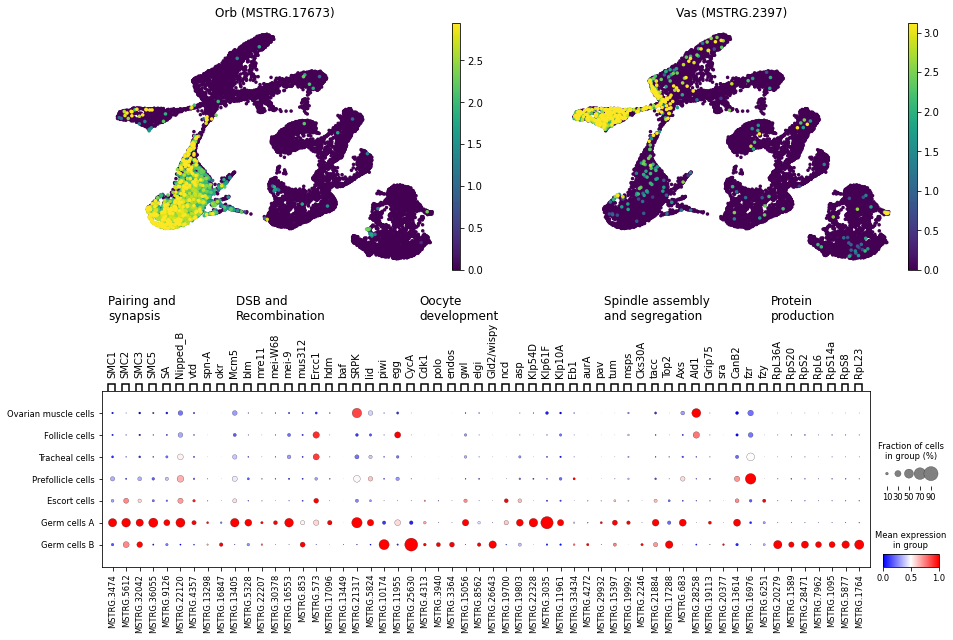

In [8]:
#fig, (ax0,ax1) = plt.subplots(2, 2, figsize=(20,20), gridspec_kw={'wspace':0.1,'hspace':0.3})
import numpy as np
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
#plt.figure(figsize=(20, 5))

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

pl.figure(figsize=(15, 10))
ax0 = pl.subplot(gs[0, 0]) # row 0, col 0
ax0_dict1= sc.pl.umap(artemia_2, color=['MSTRG.17673'], s=50, frameon=False, ncols=2, vmax='p99',show=False,use_raw=False,ax=ax0)#.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries/22.cellblender/Beatriz_plots/orb.pdf')
ax0.set_title("Orb (MSTRG.17673)")
ax1 = pl.subplot(gs[0, 1]) # row 0, col 1
ax0_dict_2 = sc.pl.umap(artemia_2, color=['MSTRG.2397'], s=50, frameon=False, ncols=2, vmax='p99',show=False,use_raw=False,ax=ax1)
ax1.set_title("Vas (MSTRG.2397)")
ax2 = pl.subplot(gs[1, :]) # row 1, span all columns
markers = { 'SMC1':'MSTRG.3474', 'SMC2':'MSTRG.5612','SMC3':'MSTRG.32042','SMC5':'MSTRG.36055','SA':'MSTRG.9126','Nipped_B':'MSTRG.22120','vtd':'MSTRG.4357','spn-A':'MSTRG.13298', 'okr':'MSTRG.16847','Mcm5':'MSTRG.13405','blm':'MSTRG.5328','mre11':'MSTRG.22207','mei-W68':'MSTRG.30378','mei-9':'MSTRG.16553','mus312':'MSTRG.853','Ercc1':'MSTRG.573','hdm':'MSTRG.17096','baf':'MSTRG.13449', 'SRPK':'MSTRG.21317','lid':'MSTRG.5824','piwi':'MSTRG.10174','egg':'MSTRG.11955','CycA':'MSTRG.25630','Cdk1':'MSTRG.4313','polo':'MSTRG.3940','endos':'MSTRG.3364','gwl':'MSTRG.15056','elgi':'MSTRG.8562','Gld2/wispy':'MSTRG.26643', 'ncd':'MSTRG.19700', 'asp':'MSTRG.19803','Klp54D':'MSTRG.22328','Klp61F':'MSTRG.3035','Klp10A':'MSTRG.11961','Eb1':'MSTRG.33434','aurA':'MSTRG.4272','pav':'MSTRG.29932','tum':'MSTRG.15397','msps':'MSTRG.19992','Cks30A':'MSTRG.2246','tacc':'MSTRG.21884','Top2':'MSTRG.17288','Axs':'MSTRG.683','Ald1':'MSTRG.28258','Grip75':'MSTRG.19113','sra':'MSTRG.20377','CanB2':'MSTRG.13614','fzr':'MSTRG.16976','fzy':'MSTRG.6251','RpL36A':'MSTRG.20279','RpS20':'MSTRG.1589','RpS2':'MSTRG.28471','RpL6':'MSTRG.7962','RpS14a':'MSTRG.1095','RpS8':'MSTRG.5877','RpL23':'MSTRG.1764'}
ax2_dict=sc.pl.dotplot(artemia_2,markers,'new_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var',ax=ax2,var_group_rotation=90)
ax2.text(0.008, 1.1, 'Pairing and\nsynapsis',fontsize=12, va='top')#fontweight='bold',
ax2.text(0.16, 1.1, 'DSB and\nRecombination',fontsize=12, va='top')
ax2.text(0.38, 1.1, 'Oocyte\ndevelopment',fontsize=12, va='top')
ax2.text(0.60, 1.1, 'Spindle assembly\nand segregation',fontsize=12, va='top')
ax2.text(0.8, 1.1, 'Protein\nproduction',fontsize=12, va='top')
#ax2.vlines(0,-1,1.5,color="red",linestyle='dashed')
#ax0_dict_1 = sc.pl.umap(artemia_2_test, color=['MSTRG.2397'], s=50, frameon=False, ncols=4, vmax='p99',show=False,use_raw=False,ax=ax0[0])#.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries/22.cellblender/Beatriz_plots/orb.pdf')
#ax0[0].set_title("Vasa")
#ax0_dict_2 = sc.pl.umap(artemia_2_test, color=['MSTRG.17673'], s=50, frameon=False, ncols=4, vmax='p99',show=False,use_raw=False,ax=ax0[1])
#ax0[1].set_title("Orb")
#plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/meiosis_markers_simplified_v4.pdf',bbox_inches='tight',facecolor='white', edgecolor='white')

{'mainplot_ax': <AxesSubplot:>,
 'gene_group_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

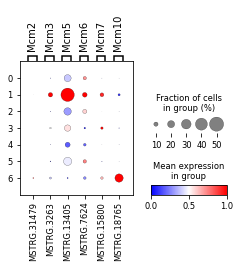

In [9]:
#mcms
markers = { 'Mcm2':'MSTRG.31479', 'Mcm3':'MSTRG.3263','Mcm5':'MSTRG.13405','Mcm6':'MSTRG.7624','Mcm7':'MSTRG.15800','Mcm10':'MSTRG.18765'}
sc.pl.dotplot(artemia_2,markers,'seurat_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var')
#plt.savefig('genes_involved_in_meiotic_maturation.png',bbox_inches='tight',facecolor='white', edgecolor='white')
#plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/mcms.png',bbox_inches='tight',facecolor='white', edgecolor='white')

{'mainplot_ax': <AxesSubplot:>,
 'gene_group_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

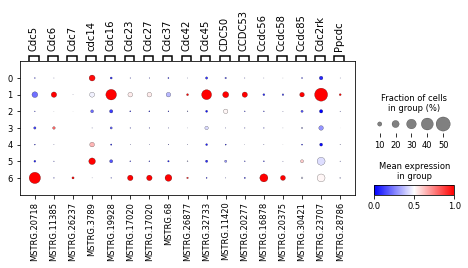

In [10]:
#cdc
markers = { 'Cdc5':'MSTRG.20718', 'Cdc6':'MSTRG.11385','Cdc7':'MSTRG.26237','cdc14':'MSTRG.3789','Cdc16':'MSTRG.19928','Cdc23':'MSTRG.17020','Cdc27':'MSTRG.17020','Cdc37':'MSTRG.68','Cdc42':'MSTRG.26877','Cdc45':'MSTRG.32733','CDC50':'MSTRG.11420','CCDC53':'MSTRG.20277','Ccdc56':'MSTRG.16878','Ccdc58':'MSTRG.20375','Ccdc85':'MSTRG.30421','Cdc2rk':'MSTRG.23707','Ppcdc':'MSTRG.28786'}
sc.pl.dotplot(artemia_2,markers,'seurat_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var')
#plt.savefig('genes_involved_in_meiotic_maturation.png',bbox_inches='tight',facecolor='white', edgecolor='white')
#plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/cdc.png',bbox_inches='tight',facecolor='white', edgecolor='white')

{'mainplot_ax': <AxesSubplot:>,
 'gene_group_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

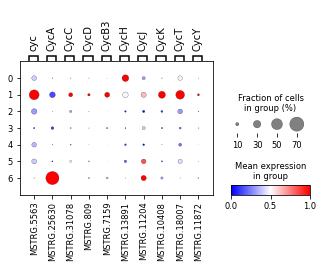

In [153]:
#cyclins
markers = {'cyc':'MSTRG.5563','CycA':'MSTRG.25630','CycC':'MSTRG.31078','CycD':'MSTRG.809','CycB3':'MSTRG.7159','CycH':'MSTRG.13891','CycJ':'MSTRG.11204','CycK':'MSTRG.10408','CycT':'MSTRG.18007','CycY':'MSTRG.11872'}
sc.pl.dotplot(artemia_2,markers,'seurat_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var')
#plt.savefig('genes_involved_in_meiotic_maturation.png',bbox_inches='tight',facecolor='white', edgecolor='white')
#plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/cyclins.png',bbox_inches='tight',facecolor='white', edgecolor='white')

{'mainplot_ax': <AxesSubplot:>,
 'gene_group_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

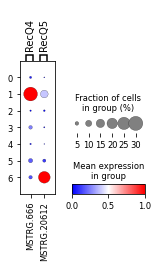

In [107]:
#recq
markers = { 'RecQ4':'MSTRG.666', 'RecQ5':'MSTRG.20612'}
sc.pl.dotplot(artemia_2,markers,'seurat_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var')
#plt.savefig('genes_involved_in_meiotic_maturation.png',bbox_inches='tight',facecolor='white', edgecolor='white')
#plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/recq.png',bbox_inches='tight',facecolor='white', edgecolor='white')

{'mainplot_ax': <AxesSubplot:>,
 'gene_group_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

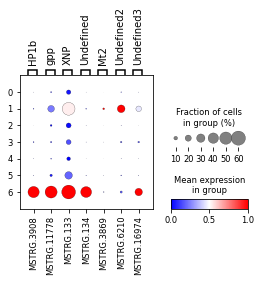

In [11]:
#heterochromatin
markers = { 'HP1b':'MSTRG.3908', 'gpp':'MSTRG.11778','XNP':'MSTRG.133','Undefined':'MSTRG.134','Mt2':'MSTRG.3869','Undefined2':'MSTRG.6210','Undefined3':'MSTRG.16974'}
sc.pl.dotplot(artemia_2,markers,'seurat_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var',var_group_rotation=90)
#plt.savefig('genes_involved_in_meiotic_maturation.png',bbox_inches='tight',facecolor='white', edgecolor='white')
#plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/recq.png',bbox_inches='tight',facecolor='white', edgecolor='white')

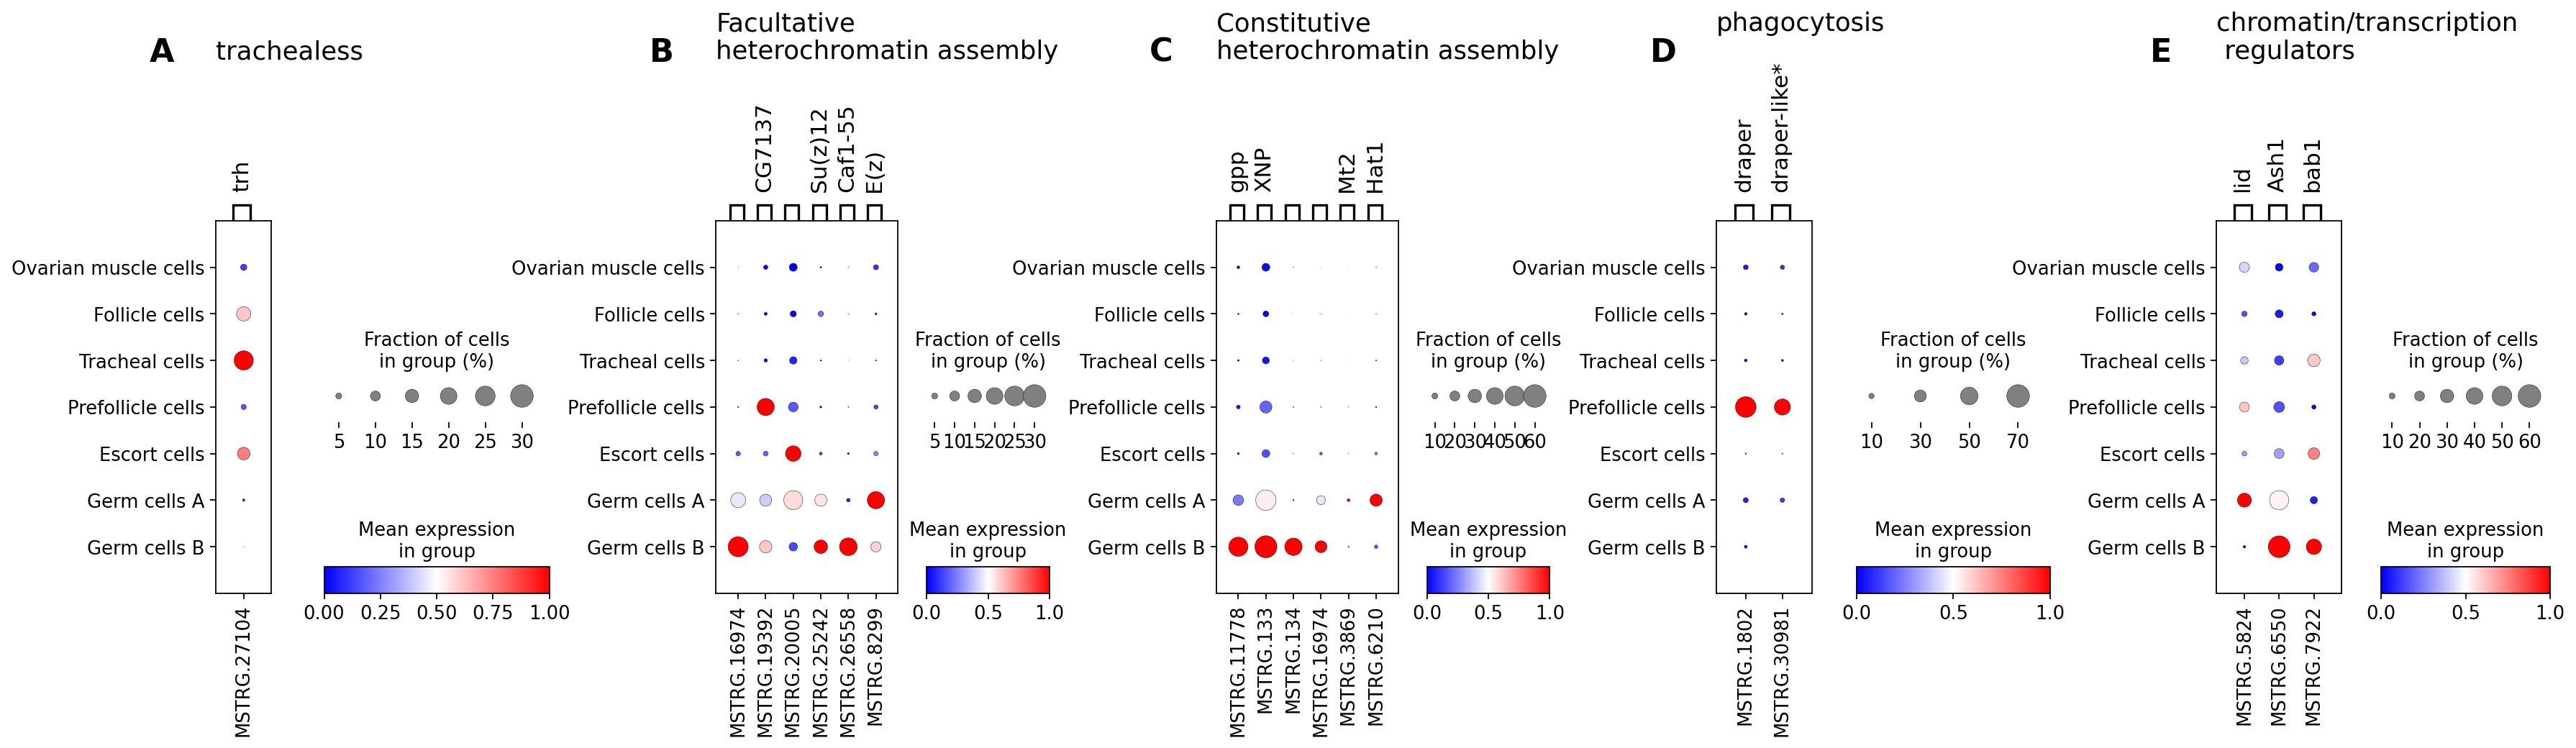

In [12]:
#Facultative heterochromatin assembly
fig, (ax0,ax1, ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(26,6), gridspec_kw={'wspace':0.5})
sc.set_figure_params(scanpy=True, fontsize=14)
#plt.rcParams["axes.labelweight"] = "normal"
trh={'trh':'MSTRG.27104'}
sc.pl.dotplot(artemia_2,trh,'new_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var',var_group_rotation=90,ax=ax0)
ax0.set_title("trachealess",loc='left',fontsize=16)
ax0.text(-0.2, 1.06, 'A',fontsize=20, fontweight='bold', va='top')
FC={' ':'MSTRG.16974','CG7137':'MSTRG.19392','   ':'MSTRG.20005','Su(z)12':'MSTRG.25242','Caf1-55':'MSTRG.26558','E(z)':'MSTRG.8299'}
sc.pl.dotplot(artemia_2,FC,'new_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var',ax=ax1,var_group_rotation=90)
ax1.text(-0.2, 1.06, 'B',fontsize=20, fontweight='bold', va='top')
ax1.set_title("Facultative\nheterochromatin assembly",loc='left',fontsize=16)
#Constinutive heterochromatin assembly
CC={'gpp':'MSTRG.11778','XNP':'MSTRG.133','   ':'MSTRG.134',' ':'MSTRG.16974','Mt2':'MSTRG.3869','Hat1':'MSTRG.6210'}
sc.pl.dotplot(artemia_2,CC,'new_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var',ax=ax2,var_group_rotation=90)
ax2.set_title("Constitutive\nheterochromatin assembly",loc='left',fontsize=16)
ax2.text(-0.2, 1.06, 'C',fontsize=20, fontweight='bold', va='top')
markers = { 'draper':'MSTRG.1802','draper-like*':'MSTRG.30981'}
sc.pl.dotplot(artemia_2,markers,'new_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var',var_group_rotation=90,ax=ax3)
ax3.set_title("phagocytosis\n",loc='left',fontsize=16)
ax3.text(-0.2, 1.06, 'D',fontsize=20, fontweight='bold', va='top')
trans_reg={'lid':'MSTRG.5824','Ash1':'MSTRG.6550','bab1':'MSTRG.7922'}
sc.pl.dotplot(artemia_2,trans_reg,'new_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var',var_group_rotation=90,ax=ax4)
ax4.set_title("chromatin/transcription\n regulators",loc='left',fontsize=16)
ax4.text(-0.2, 1.06, 'E',fontsize=20, fontweight='bold', va='top')
plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/heterochromatin_and_draper_v2.png',bbox_inches='tight',facecolor='white', edgecolor='white')

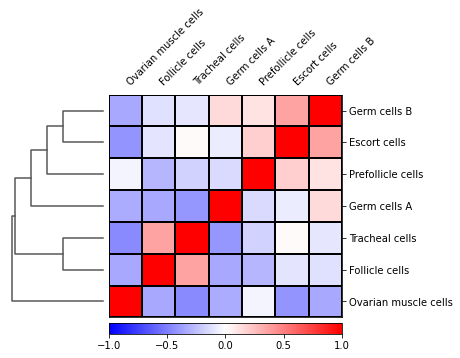

In [14]:
sc.pl.correlation_matrix(artemia_2,groupby='new_clusters',save='dendogram_and_correlation.pdf')


{'mainplot_ax': <AxesSubplot:>,
 'gene_group_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

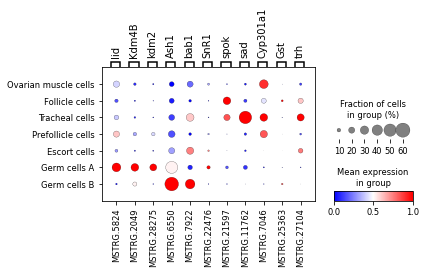

In [9]:
demytheles={'lid':'MSTRG.5824','Kdm4B':'MSTRG.2049','kdm2':'MSTRG.28275','Ash1':'MSTRG.6550','bab1':'MSTRG.7922','SnR1':'MSTRG.22476','spok':'MSTRG.21597','sad':'MSTRG.11762','Cyp301a1':'MSTRG.7046','Gst':'MSTRG.25363','trh':'MSTRG.27104'}
sc.pl.dotplot(artemia_2,demytheles,'new_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var',var_group_rotation=90)



<AxesSubplot:title={'center':'MSTRG.27104'}, xlabel='UMAP1', ylabel='UMAP2'>

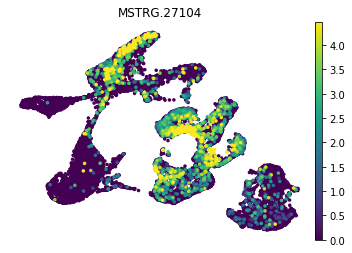

In [10]:
sc.pl.umap(artemia_2, color=['MSTRG.27104'], s=50, frameon=False, ncols=2, vmax='p99',show=False,use_raw=False)

{'mainplot_ax': <AxesSubplot:>,
 'gene_group_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

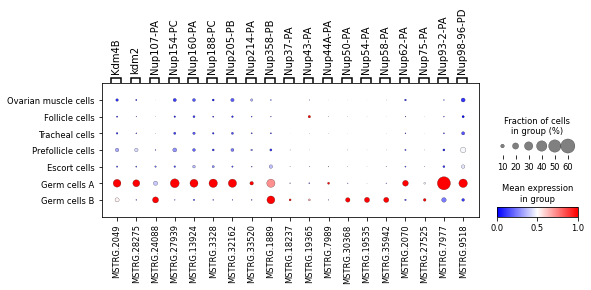

In [9]:
nucleoporins={'Kdm4B':'MSTRG.2049','kdm2':'MSTRG.28275','Nup107-PA': 'MSTRG.24088', 'Nup154-PC': 'MSTRG.27939','Nup160-PA': 'MSTRG.13924', 'Nup188-PC': 'MSTRG.3328', 'Nup205-PB':'MSTRG.32162','Nup214-PA':'MSTRG.33520',
 'Nup358-PB':'MSTRG.1889',
 'Nup37-PA':'MSTRG.18237',
 'Nup43-PA':'MSTRG.19365',
 'Nup44A-PA':'MSTRG.7989',
 'Nup50-PA':'MSTRG.30368',
 'Nup54-PA': 'MSTRG.19535',
 'Nup58-PA': 'MSTRG.35942',
 'Nup62-PA': 'MSTRG.2070',
 'Nup75-PA': 'MSTRG.27525',
 'Nup93-2-PA': 'MSTRG.7977',
 'Nup98-96-PD': 'MSTRG.9518'}
sc.pl.dotplot(artemia_2,nucleoporins,'new_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var',var_group_rotation=90)



/nfs/scistore18/vicosgrp/melkrewi/.local/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/nfs/scistore18/vicosgrp/melkrewi/.local/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/nfs/scistore18/vicosgrp/melkrewi/.local/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/nfs/scistore18/vicosgrp/melkrewi/.local/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list i

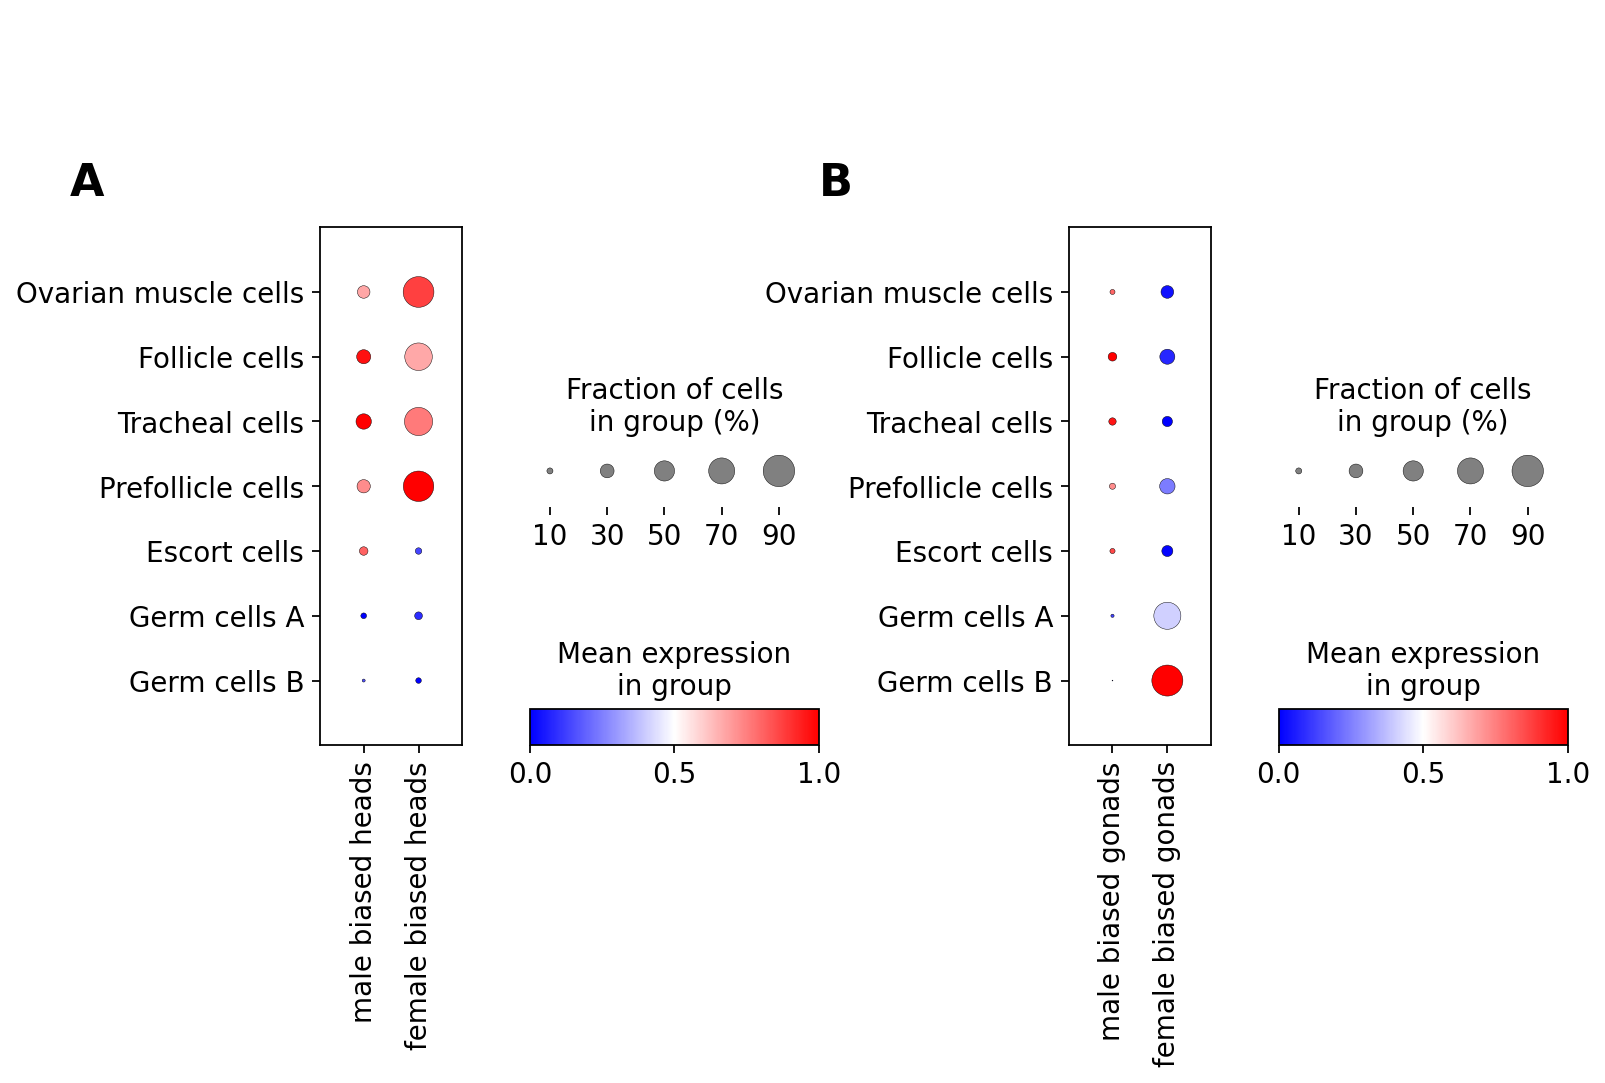

In [35]:
male_biased_heads = ['MSTRG.11300','MSTRG.12581','MSTRG.14036','MSTRG.14885','MSTRG.17665',
'MSTRG.18204','MSTRG.19210',
'MSTRG.19211','MSTRG.19252',
'MSTRG.19499','MSTRG.21937',
'MSTRG.22693','MSTRG.24172',
'MSTRG.2695','MSTRG.2732',
'MSTRG.29209','MSTRG.29887',
'MSTRG.30050','MSTRG.31315',
'MSTRG.32016','MSTRG.32860',
'MSTRG.33229','MSTRG.3447',
'MSTRG.34693','MSTRG.3585',
'MSTRG.35983','MSTRG.36171',
'MSTRG.594','MSTRG.8120',
'MSTRG.8539','MSTRG.8543',
'MSTRG.8544','MSTRG.9553']
female_biased_heads =['MSTRG.11587',
'MSTRG.11588','MSTRG.11852',
'MSTRG.1188','MSTRG.11880',
'MSTRG.12340','MSTRG.13129',
'MSTRG.13514','MSTRG.14590',
'MSTRG.17511','MSTRG.17731',
'MSTRG.18286','MSTRG.19209',
'MSTRG.19212','MSTRG.19250',
'MSTRG.20328','MSTRG.22441',
'MSTRG.24493','MSTRG.2783',
'MSTRG.2829','MSTRG.28546',
'MSTRG.28549','MSTRG.28556',
'MSTRG.28571','MSTRG.28578',
'MSTRG.28594','MSTRG.28595',
'MSTRG.28596','MSTRG.28598',
'MSTRG.28605','MSTRG.28636',
'MSTRG.28637','MSTRG.28640',
'MSTRG.28646','MSTRG.28647',
'MSTRG.28649','MSTRG.28656',
'MSTRG.28657','MSTRG.28672',
'MSTRG.28686','MSTRG.28694',
'MSTRG.28697','MSTRG.28718',
'MSTRG.28733','MSTRG.28734',
'MSTRG.28770','MSTRG.28803',
'MSTRG.28804','MSTRG.28805',
'MSTRG.28828','MSTRG.28830',
'MSTRG.28861','MSTRG.28863',
'MSTRG.28873','MSTRG.28875',
'MSTRG.28895','MSTRG.28940',
'MSTRG.28941','MSTRG.28945',
'MSTRG.28950','MSTRG.28952',
'MSTRG.28968','MSTRG.29003',
'MSTRG.29031','MSTRG.29083',
'MSTRG.29085','MSTRG.29101',
'MSTRG.29103','MSTRG.29293',
'MSTRG.29324','MSTRG.29754',
'MSTRG.29755','MSTRG.29756',
'MSTRG.29757','MSTRG.29758',
'MSTRG.29760','MSTRG.29762',
'MSTRG.29766','MSTRG.29767',
'MSTRG.29768','MSTRG.30162',
'MSTRG.30556','MSTRG.30620',
'MSTRG.31242','MSTRG.32070',
'MSTRG.32466','MSTRG.33005',
'MSTRG.33041','MSTRG.33288',
'MSTRG.33395','MSTRG.33396',
'MSTRG.33398','MSTRG.33956',
'MSTRG.34129','MSTRG.34223',
'MSTRG.34246','MSTRG.34505',
'MSTRG.34506','MSTRG.34610',
'MSTRG.34611','MSTRG.34640',
'MSTRG.34689','MSTRG.34792',
'MSTRG.34952','MSTRG.34954',
'MSTRG.35177','MSTRG.35297',
'MSTRG.35324','MSTRG.35499',
'MSTRG.35500','MSTRG.35644']
male_biased_gonads = ['MSTRG.29889',
'MSTRG.25521',
'MSTRG.8699',
'MSTRG.2385',
'MSTRG.14231',
'MSTRG.33913',
'MSTRG.18879',
'MSTRG.2829',
'MSTRG.9864',
'MSTRG.33365',
'MSTRG.14014',
'MSTRG.6861',
'MSTRG.27919',
'MSTRG.21929',
'MSTRG.34801',
'MSTRG.382',
'MSTRG.22889',
'MSTRG.17658',
'MSTRG.1619',
'MSTRG.22109',
'MSTRG.35034',
'MSTRG.29572',
'MSTRG.27812',
'MSTRG.29805',
'MSTRG.25549',
'MSTRG.36174',
'MSTRG.5501',
'MSTRG.5820',
'MSTRG.6982',
'MSTRG.6061',
'MSTRG.28433',
'MSTRG.17653',
'MSTRG.18586',
'MSTRG.33750',
'MSTRG.2575',
'MSTRG.35850',
'MSTRG.16480',
'MSTRG.29819',
'MSTRG.25203',
'MSTRG.19268',
'MSTRG.21091',
'MSTRG.12613',
'MSTRG.27014',
'MSTRG.32747',
'MSTRG.11482',
'MSTRG.35652',
'MSTRG.30670',
'MSTRG.13085',
'MSTRG.4584',
'MSTRG.17941',
'MSTRG.6072',
'MSTRG.13051',
'MSTRG.36353',
'MSTRG.26882',
'MSTRG.30011',
'MSTRG.33327',
'MSTRG.6553',
'MSTRG.10861',
'MSTRG.23444',
'MSTRG.17654',
'MSTRG.23045',
'MSTRG.5963',
'MSTRG.18629',
'MSTRG.14221',
'MSTRG.9991',
'MSTRG.4033',
'MSTRG.3360',
'MSTRG.29531',
'MSTRG.5296',
'MSTRG.20096',
'MSTRG.5288',
'MSTRG.13918',
'MSTRG.22373',
'MSTRG.24850',
'MSTRG.5902',
'MSTRG.18575',
'MSTRG.8289',
'MSTRG.321',
'MSTRG.20094',
'MSTRG.7743',
'MSTRG.19179',
'MSTRG.7794',
'MSTRG.27682',
'MSTRG.30736',
'MSTRG.22445',
'MSTRG.17204',
'MSTRG.13601',
'MSTRG.9540',
'MSTRG.20491',
'MSTRG.15135',
'MSTRG.1116',
'MSTRG.3173',
'MSTRG.25312',
'MSTRG.27344',
'MSTRG.29575',
'MSTRG.12420',
'MSTRG.15567',
'MSTRG.10004',
'MSTRG.21915',
'MSTRG.7394',
'MSTRG.17182',
'MSTRG.29415',
'MSTRG.5866',
'MSTRG.21620',
'MSTRG.10469',
'MSTRG.35914',
'MSTRG.24936',
'MSTRG.13812',
'MSTRG.35494',
'MSTRG.15959',
'MSTRG.29571',
'MSTRG.27378',
'MSTRG.31105',
'MSTRG.14616',
'MSTRG.6057',
'MSTRG.12217',
'MSTRG.32455',
'MSTRG.28325',
'MSTRG.18850',
'MSTRG.23259',
'MSTRG.19641',
'MSTRG.4235',
'MSTRG.22103',
'MSTRG.34780',
'MSTRG.11885',
'MSTRG.5445',
'MSTRG.35522',
'MSTRG.33352',
'MSTRG.23257',
'MSTRG.33337',
'MSTRG.30260',
'MSTRG.29579',
'MSTRG.31870',
'MSTRG.25189',
'MSTRG.6091',
'MSTRG.17703',
'MSTRG.11079',
'MSTRG.30371',
'MSTRG.30886',
'MSTRG.19776',
'MSTRG.16098',
'MSTRG.23260',
'MSTRG.34092',
'MSTRG.13922',
'MSTRG.7324',
'MSTRG.26848',
'MSTRG.30248',
'MSTRG.34298',
'MSTRG.34333',
'MSTRG.36256',
'MSTRG.821',
'MSTRG.18319',
'MSTRG.21542',
'MSTRG.13502',
'MSTRG.35890',
'MSTRG.18929',
'MSTRG.26353',
'MSTRG.34332',
'MSTRG.21523',
'MSTRG.28722',
'MSTRG.27381',
'MSTRG.28799',
'MSTRG.34589',
'MSTRG.24577',
'MSTRG.5417',
'MSTRG.22132']
female_biased_gonads =['MSTRG.8761',
'MSTRG.15802',
'MSTRG.12163',
'MSTRG.35177',
'MSTRG.28556',
'MSTRG.12070',
'MSTRG.28578',
'MSTRG.29758',
'MSTRG.26172',
'MSTRG.36366',
'MSTRG.8050',
'MSTRG.28863',
'MSTRG.28636',
'MSTRG.28549',
'MSTRG.28640',
'MSTRG.28571',
'MSTRG.7847',
'MSTRG.4009',
'MSTRG.22158',
'MSTRG.34246',
'MSTRG.12123',
'MSTRG.25642',
'MSTRG.28631',
'MSTRG.8047',
'MSTRG.33396',
'MSTRG.32192',
'MSTRG.26127',
'MSTRG.28861',
'MSTRG.29003',
'MSTRG.33956',
'MSTRG.28770',
'MSTRG.26272',
'MSTRG.28598',
'MSTRG.2379',
'MSTRG.24016',
'MSTRG.26545',
'MSTRG.3634',
'MSTRG.23404',
'MSTRG.3441',
'MSTRG.28686',
'MSTRG.24840',
'MSTRG.4750',
'MSTRG.3203',
'MSTRG.33198',
'MSTRG.8073',
'MSTRG.29031',
'MSTRG.8048',
'MSTRG.2035',
'MSTRG.28594',
'MSTRG.20793',
'MSTRG.12507',
'MSTRG.21448',
'MSTRG.17431',
'MSTRG.26125',
'MSTRG.28718',
'MSTRG.29760',
'MSTRG.29101',
'MSTRG.7453',
'MSTRG.25798',
'MSTRG.25034',
'MSTRG.20146',
'MSTRG.28694',
'MSTRG.11640',
'MSTRG.6021',
'MSTRG.7371',
'MSTRG.21622',
'MSTRG.34223',
'MSTRG.16007',
'MSTRG.20537',
'MSTRG.28637',
'MSTRG.7807',
'MSTRG.23332',
'MSTRG.33798',
'MSTRG.3657',
'MSTRG.7484',
'MSTRG.28941',
'MSTRG.8830',
'MSTRG.32100',
'MSTRG.29756',
'MSTRG.22872',
'MSTRG.29103',
'MSTRG.34640',
'MSTRG.34689',
'MSTRG.5461',
'MSTRG.3445',
'MSTRG.28830',
'MSTRG.28875',
'MSTRG.29754',
'MSTRG.13054',
'MSTRG.22751',
'MSTRG.24260',
'MSTRG.1508',
'MSTRG.29762',
'MSTRG.14332',
'MSTRG.28940',
'MSTRG.7701',
'MSTRG.12508',
'MSTRG.28600',
'MSTRG.33991',
'MSTRG.10537',
'MSTRG.21634',
'MSTRG.21633',
'MSTRG.7809',
'MSTRG.10536',
'MSTRG.33989',
'MSTRG.28100','MSTRG.7492','MSTRG.10322','MSTRG.8852','MSTRG.10535','MSTRG.33988','MSTRG.24562','MSTRG.10320','MSTRG.3534','MSTRG.21447']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6), gridspec_kw={'wspace':0.5})
ax1.text(-0.5, 0.8, 'A',fontsize=20, fontweight='bold', va='top')
ax2.text(-0.5, 0.8, 'B',fontsize=20, fontweight='bold', va='top')
sc.set_figure_params(scanpy=True, fontsize=15)
sc.tl.score_genes(artemia_2, male_biased_heads, score_name='male biased heads')
sc.tl.score_genes(artemia_2, female_biased_heads, score_name='female biased heads')
sc.tl.score_genes(artemia_2, male_biased_gonads, score_name='male biased gonads')
sc.tl.score_genes(artemia_2, female_biased_gonads, score_name='female biased gonads')
sc.pl.dotplot(artemia_2, ['male biased heads','female biased heads'],'new_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var',var_group_rotation=90,ax=ax1)#,save='male_and_female_biased_genes.png')
sc.pl.dotplot(artemia_2, ['male biased gonads','female biased gonads'],'new_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var',var_group_rotation=90,ax=ax2)#,save='male_and_female_biased_genes.png')
plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/male_and_female_biased.png',bbox_inches='tight',facecolor='white', edgecolor='white')

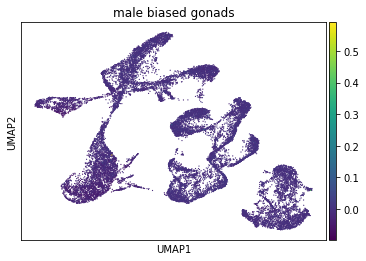

In [14]:
sc.pl.umap(artemia_2, color='male biased gonads')


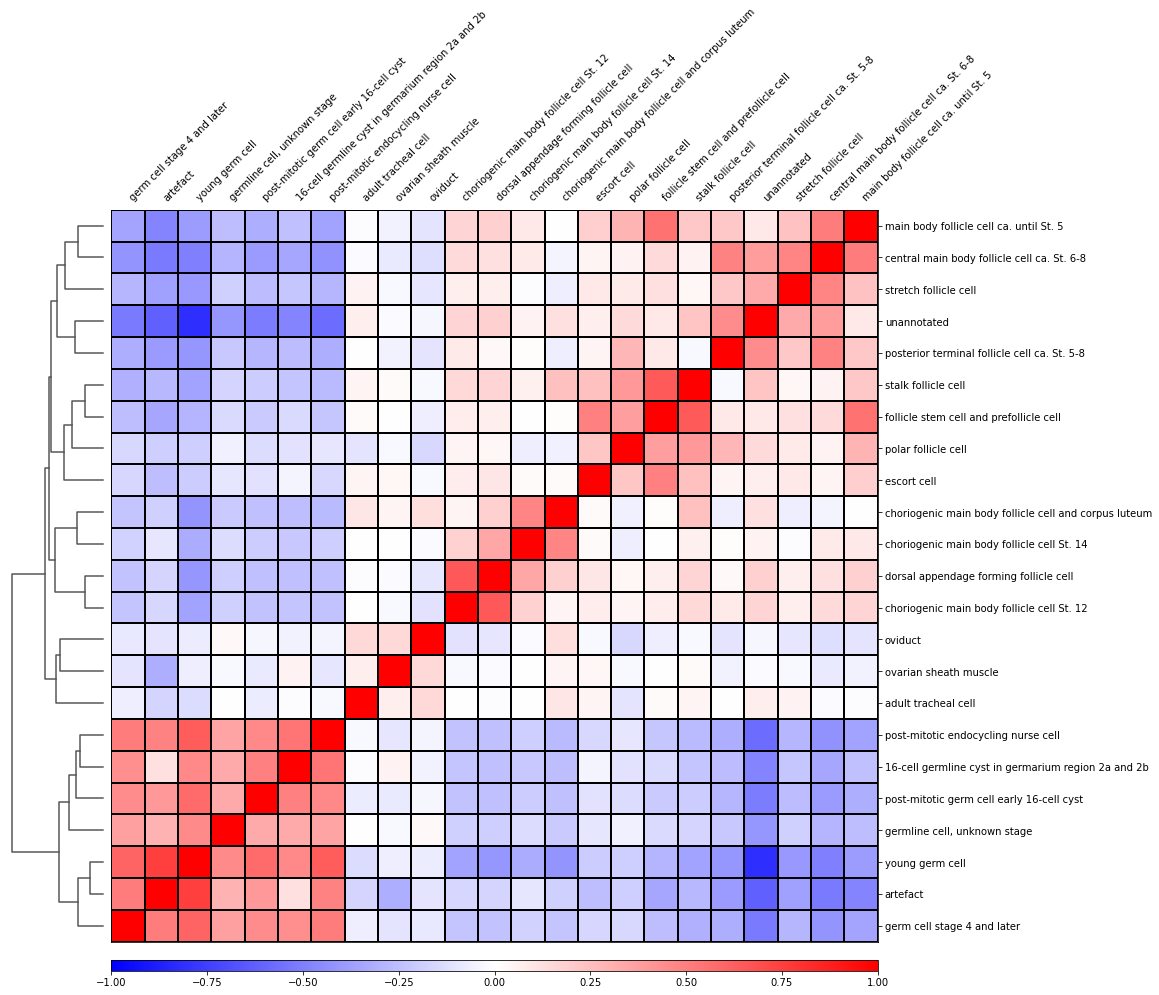

In [15]:
drosophila=scanpy.read_h5ad("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries/22.cellblender/analysis_6/s_fca_biohub_ovary_10x.h5ad", chunk_size=6000)
sc.pl.correlation_matrix(drosophila,groupby='annotation',save='drosophiladendogram_and_correlation.pdf')